## Домашнее задание №7

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [1]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

### Задача №1: 
Обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В данном задании воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплан обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку первого занятия.

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в дальнейшем.

100%|██████████| 9912422/9912422 [00:01<00:00, 9619729.57it/s] 


Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 14536864.73it/s]


Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 4767978.89it/s]


Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4678420.62it/s]

Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw



Text(0.5, 1.0, 'Image label: 0')

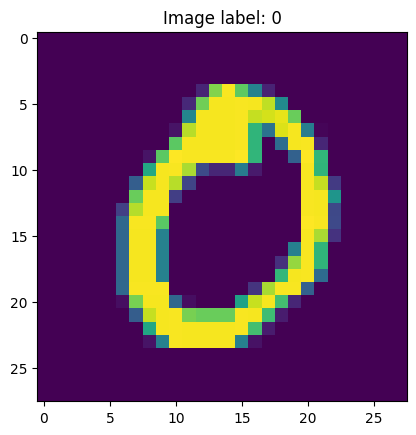

In [2]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 92% accuracy.

*Комментарий: для этого достаточно линейных слоев и функций активации.*

__Внимание, ваша модель должна быть представлена именно переменной `model`.__

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")


class MnistNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,100)
        self.Matrix2 = nn.Linear(100,50)
        self.Matrix3 = nn.Linear(50,10)
        self.R = nn.ReLU()
    def forward(self,x):
        x = x.view(-1,28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()

# Creating model instance
model = MnistNeuralNet() # your code here

Using cuda device


Локальные тесты для проверки вашей модели доступны ниже:

In [4]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)    
except Exception as e:
    print('Something is wrong with the model')
    raise e
    
    
assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Настройте параметры модели на обучающей выборке. Рекомендуем поработать с различными оптимизаторами.

In [ ]:
# your code here

Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [ ]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [ ]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

In [ ]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [ ]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Проверка, что необходимые пороги пройдены:

In [ ]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

### Сдача задания
Загрузите файл `hw07_data_dict.npy` (ссылка есть на странице с заданием) и запустите код ниже для генерации посылки. Код ниже может его загрузить (но в случае возникновения ошибки скачайте и загрузите его вручную).

In [ ]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23s_dd_ml/homeworks/hw07_mnist_classification/hw07_data_dict.npy

In [7]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import requests, gzip, os, hashlib

import torch
import torch.nn as nn
import torch.optim as optim
#from torchsummary import summary

from model import Net

# define path to store dataset
path = "Datasets/mnist"
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

def fetch(url):
    if os.path.exists(path) is False:
        os.makedirs(path)

    fp = os.path.join(path, hashlib.md5(url.encode("utf-8")).hexdigest())
    if os.path.isfile(fp):
        with open(fp, "rb") as f:
            data = f.read()
    else:
        with open(fp, "wb") as f:
            data = requests.get(url).content
            f.write(data)
    return np.frombuffer(gzip.decompress(data), dtype=np.uint8).copy()

# load mnist dataset from yann.lecun.com, train data is of shape (60000, 28, 28) and targets are of shape (60000)
train_data = fetch("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
train_targets = fetch("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz")[8:]
test_data = fetch("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
test_targets = fetch("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz")[8:]

# uncomment to show images from dataset using OpenCV
# for train_image, train_target in zip(train_data, train_targets):
#     train_image = cv2.resize(train_image, (400, 400))
#     cv2.imshow("Image", train_image)
#     # if Q button break this loop
#     if cv2.waitKey(0) & 0xFF == ord("q"):
#         break
# cv2.destroyAllWindows()

# define training hyperparameters
n_epochs = 5
batch_size_train = 64
batch_size_test = 64
learning_rate = 0.001

# reshape data to (items, channels, height, width) and normalize to [0, 1]
train_data = np.expand_dims(train_data, axis=1) / 255.0
test_data = np.expand_dims(test_data, axis=1) / 255.0

# split data into batches of size [(batch_size, 1, 28, 28) ...]
train_batches = [np.array(train_data[i:i+batch_size_train]) for i in range(0, len(train_data), batch_size_train)]
# split targets into batches of size [(batch_size) ...]
train_target_batches = [np.array(train_targets[i:i+batch_size_train]) for i in range(0, len(train_targets), batch_size_train)]

test_batches = [np.array(test_data[i:i+batch_size_test]) for i in range(0, len(test_data), batch_size_test)]
test_target_batches = [np.array(test_targets[i:i+batch_size_test]) for i in range(0, len(test_targets), batch_size_test)]

# create model
model = Net()

# uncomment to print model summary
#summary(model, (1, 28, 28), device="cpu")

# define loss function and optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss()

# create training loop
def train(epoch):
    # set model to training mode
    model.train()

    loss_sum = 0
    # create a progress bar
    train_pbar = tqdm(zip(train_batches, train_target_batches), total=len(train_batches))
    for index, (data, target) in enumerate(train_pbar, start=1):

        # convert data to torch.FloatTensor
        data = torch.from_numpy(data).float()
        target = torch.from_numpy(target).long()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()

        # update progress bar with loss value
        loss_sum += loss.item()
        train_pbar.set_description(f"Epoch {epoch}, loss: {loss_sum / index:.4f}")

# create testing loop
def test(epoch):
    # set model to evaluation mode
    model.eval()

    correct, loss_sum = 0, 0
    # create progress bar
    val_pbar = tqdm(zip(test_batches, test_target_batches), total=len(test_batches))
    with torch.no_grad():
        for index, (data, target) in enumerate(val_pbar, start=1):

            # convert data to torch.FloatTensor
            data = torch.from_numpy(data).float()
            target = torch.from_numpy(target).long()

            # forward pass
            output = model(data)

            # update progress bar with loss and accuracy values
            loss_sum += loss_function(output, target).item() / target.size(0)
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum() / target.size(0)

            val_pbar.set_description(f"val_loss: {loss_sum / index:.4f}, val_accuracy: {correct / index:.4f}")


# train and test the model
for epoch in range(1, n_epochs + 1):
    train(epoch)
    test(epoch)

# define output path and create folder if not exists
output_path = "Models/06_pytorch_introduction"
if not os.path.exists(output_path):
    os.makedirs(output_path)

# save model.pt to defined output path
torch.save(model.state_dict(), os.path.join(output_path, "model.pt"))

# do not change the code in the block below
# __________start of block__________
import os

assert os.path.exists('hw07_data_dict.npy'), 'Please, download `hw07_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):
    
    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))
    
    predicted_labels = torch.cat(predicted_labels)
    return predicted_labels

loaded_data_dict = np.load('hw07_data_dict.npy', allow_pickle=True)


val_loss: 0.0009, val_accuracy: 0.9802: 100%|██████████| 157/157 [00:00<00:00, 244.06it/s]


In [9]:
# do not change the code in the block below
# __________start of block__________
import os

assert os.path.exists('hw07_data_dict.npy'), 'Please, download `hw07_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):
    
    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))
    
    predicted_labels = torch.cat(predicted_labels)
    return predicted_labels

loaded_data_dict = np.load('hw07_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])).numpy(),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test'])).numpy()
}

np.save('submission_dict_hw07.npy', submission_dict, allow_pickle=True)
print('File saved to `submission_dict_hw07.npy`')
# __________end of block__________

RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [10, 784]

На этом задание завершено. Поздравляем!